# Notebook to summarise demographics info of the whole cohort  

In [90]:
import os
import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

In [93]:
meld_bids_folder = '/home/mathilde/Documents/RDS/MELD_FE/DATA'

site_paths = glob.glob(os.path.join(meld_bids_folder,'MELD_*'))

In [108]:
# concatenate all the demographic

df = pd.DataFrame()
for site_path in site_paths:
    site_code = os.path.basename(site_path).split('MELD_')[-1]
    demographic_file = os.path.join(site_path,f'MELD_participants_infos_{site_code}.csv')
    if os.path.isfile(demographic_file):
        df_site = pd.read_csv(demographic_file)
        df = pd.concat([df, df_site])
    else:
        print(f'{site_code} does not have a demographic files')


H104 does not have a demographic files
participants_info_template does not have a demographic files


In [109]:
df.head()

,id,included,reason exclusion,redcap_data_access_group,site,patient_control,sex,radiology,radiology_report,field_strengths___1,...,postop_t1_yr_2___unk,postop_t1_yr_2___na,surgery_date,Notes for lesion mask -OLD,Notes lesion mask,lesion_mask.1,what still need to be retrieved,age_t1_preop,reason_exclusion,reason exlusion
0,MELD_H2_P_0001,1,not qc yet,NaN,H2,1.0,1.0,10.0,right HS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MELD_H2_P_0002,1,not qc yet,NaN,H2,1.0,1.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MELD_H2_P_0003,1,not qc yet,NaN,H2,1.0,1.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MELD_H2_P_0004,1,not qc yet,NaN,H2,1.0,1.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MELD_H2_P_0005,1,not qc yet,NaN,H2,1.0,0.0,23.0,astrocytopathy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# only select subjects included 
subdf = df[df['included']==1]

In [111]:
# get list and number of sites
sites = list(set(subdf['site'].values))
sites = [site for site in sites if str(site).startswith("H")]
num_sites = len(sites)
print(f'number of sites: {num_sites}')
print(sites)

number of sites: 11
['H5', 'H10', 'H14', 'H21', 'H2', 'H101', 'H102', 'H108', 'H16', 'H11', 'H4']


In [112]:
# number of subjects
num_subjects = len(subdf)
print(f'total num subjects: {num_subjects}')


total num subjects: 1068


In [113]:
# patients or controls

num_patients = len(subdf[subdf['patient_control']==1])
num_controls = len(subdf[subdf['patient_control']==2])

print('Group: {} patients - {} controls'.format(int(num_patients), int(num_controls)))

Group: 685 patients - 383 controls


In [ ]:
# patients or controls

num_patients = len(subdf[subdf['patient_control']==1])
num_controls = len(subdf[subdf['patient_control']==2])

print('Group: {} patients - {} controls'.format(int(num_patients), int(num_controls)))

In [195]:
# male vs female

subdf.groupby(['patient_control','sex'])['id'].count()



patient_control  sex
1.0              0.0    361
                 1.0    324
2.0              0.0    156
                 1.0    227
Name: id, dtype: int64

site  patient_control
H10   1.0                 59
      2.0                269
H101  1.0                 85
      2.0                 85
H102  1.0                 40
H108  1.0                 10
H11   1.0                116
H14   1.0                 30
H16   1.0                 44
H2    1.0                 10
H21   1.0                 88
H4    1.0                130
H5    1.0                 73
      2.0                 29
Name: id, dtype: int64


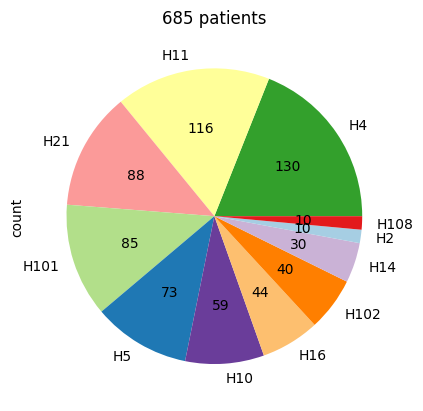

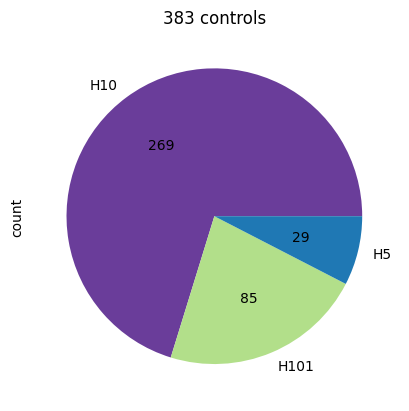

In [162]:
#breakdown of patients and controls per site
print(subdf.groupby(['site','patient_control'])['id'].count())

# Define a custom color mapping for each unique site
unique_sites = subdf['site'].unique()
site_colors = sns.color_palette("Paired", n_colors=len(unique_sites))
site_color_mapping = dict(zip(unique_sites, site_colors))

# Create a pie chart for patients
subdf_p = subdf[subdf['patient_control'] == 1]
site_counts_p = subdf_p['site'].value_counts()
site_counts_p.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_p)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_p.index]
)
plt.title(f'{num_patients} patients')
plt.show()

# Create a pie chart for controls
subdf_c = subdf[subdf['patient_control'] == 2]
site_counts_c = subdf_c['site'].value_counts()
site_counts_c.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_c)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_c.index]
)
plt.title(f'{num_controls} controls')
plt.show()

### Analyse histopathologies

In [119]:
data_dictionary = {1: 'FCD 1' ,
                   2: 'FCD 2A',
                   3: 'FCD 2B',
                   4: 'FCD 3A',
                   5: 'FCD 3B',
                   6: 'FCD 3C',
                   7: 'FCD 3D',
                   8: 'FCD 2 not otherwise specified',
                   9: 'FCD not otherwise specified',
                   10: 'Hippocampal sclerosis',
                   11: 'Hippocampal gliosis only',
                   12: 'Cortical gliosis only', 
                   13: 'DNET',
                   14: 'Ganglioglioma',
                   15: 'other low-grade tumour',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Non-specific pathology',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}

main_categories = {1: 'FCD' ,
                   2: 'FCD',
                   3: 'FCD',
                   4: 'FCD',
                   5: 'FCD',
                   6: 'FCD',
                   7: 'FCD',
                   8: 'FCD',
                   9: 'FCD',
                   10: 'HS and other',
                   11: 'HS and other',
                   12: 'Cortical gliosis only', 
                   13: 'DNET',
                   14: 'Ganglioglioma',
                   15: 'other low-grade tumour',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Non-specific pathology',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}


def apply_category(row):
    if row['patient_control']==2:
        category = 'Healthy control'
    else:
        try:
            category = main_categories[int(row['histology'])]
        except:
            category = 'not classified'
    return category

list_categories = ['FCD', 'HS and other', 'Cortical gliosis only', 
                   'DNET', 'Ganglioglioma', 'other low-grade tumour',
                   'Polymicrogyria', 'Periventricular nodular heterotopia',
                   'Cavernoma', 'Hypothalamic hamartoma', 'Non-specific pathology', 'Normal',
                    'Other', 'Healthy control'
                  ]

threshold_categories = {
                'FCD': 500,
                'HS and other': 300,
                'Cortical gliosis only' :100, 
                'DNET': 100,
                'Ganglioglioma': 100,
                'other low-grade tumour': 100,
                'Polymicrogyria': 100,
                'Periventricular nodular heterotopia': 100,
                'Cavernoma' : 100,
                'Non-specific pathology' : 0,
                'Normal': 0,
                'Hypothalamic hamartoma': 100,
                'Other': 0,
                'Healthy control': 500,
}


patient_control  main_category         
1.0              Cavernoma                   1
                 Cortical gliosis only       1
                 DNET                       21
                 FCD                       369
                 Ganglioglioma              24
                 HS and other              134
                 Hypothalamic hamartoma      3
                 Non-specific pathology     15
                 Normal                      8
                 Other                      19
                 Polymicrogyria              3
                 not classified             72
                 other low-grade tumour     15
2.0              Healthy control           383
Name: id, dtype: int64


/tmp/ipykernel_19738/1631774597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['main_category'] = subdf.apply(lambda row : apply_category(row), axis=1)


Text(0.5, 1.0, 'Distribution of histopathology')

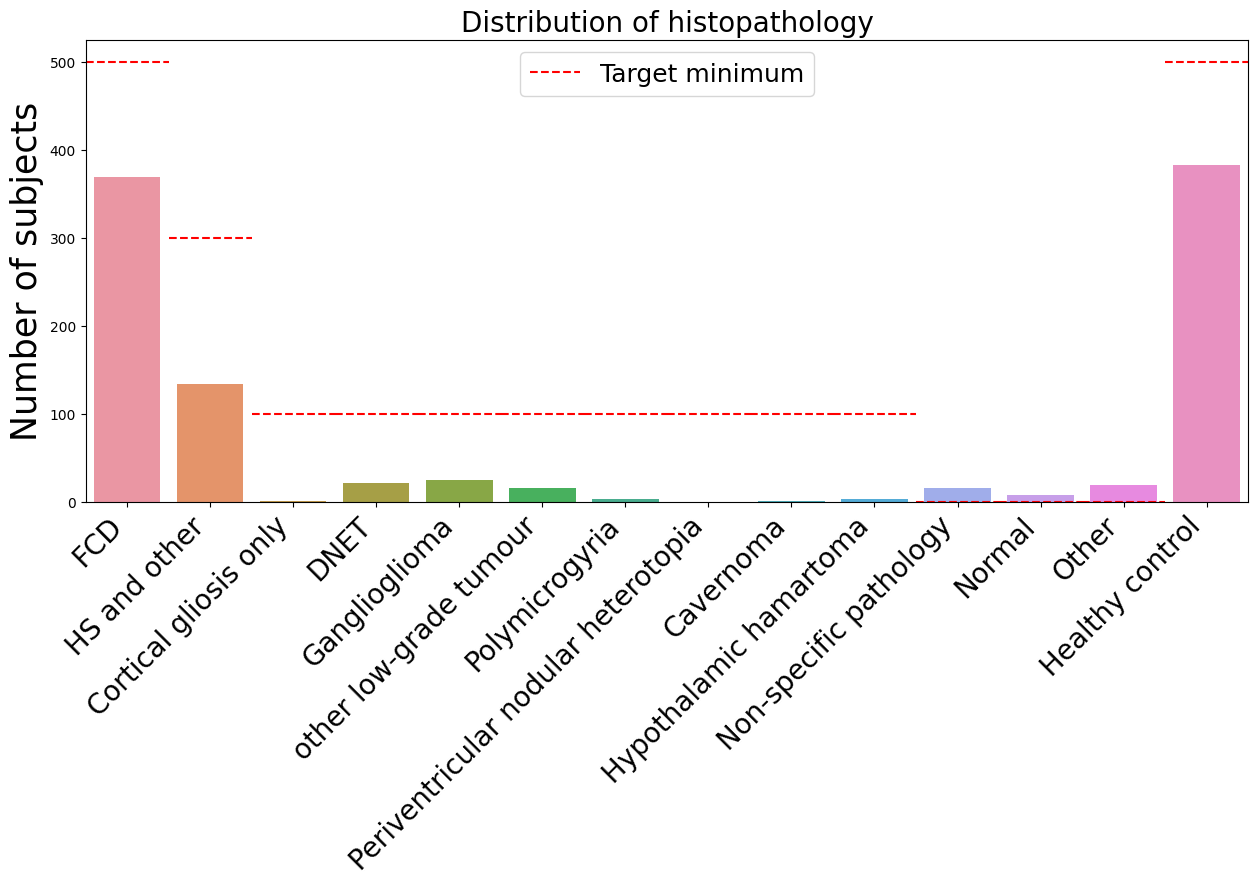

In [151]:
# recategorise histologies
subdf['main_category'] = subdf.apply(lambda row : apply_category(row), axis=1)

print(subdf.groupby(['patient_control','main_category'])['id'].count())

fig, ax = plt.subplots(figsize=(15,6))
g=sns.countplot(x='main_category', data=subdf, order=list_categories)
ax.set_ylabel('Number of subjects', fontsize=25)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category
    ax.axhline(y=threshold_value, color='red', linestyle='--', label=f'Threshold ({category}: {threshold_value})', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax.legend([ax.get_legend_handles_labels()[0][0]],['Target minimum'], loc='upper center', fontsize=18)
ax.set_title('Distribution of histopathology', fontsize=20)

In [136]:
ax.get_legend_handles_labels()[0][0]

## Create summary report

Text(0.5, 1.0, 'Histopathologies distribution')

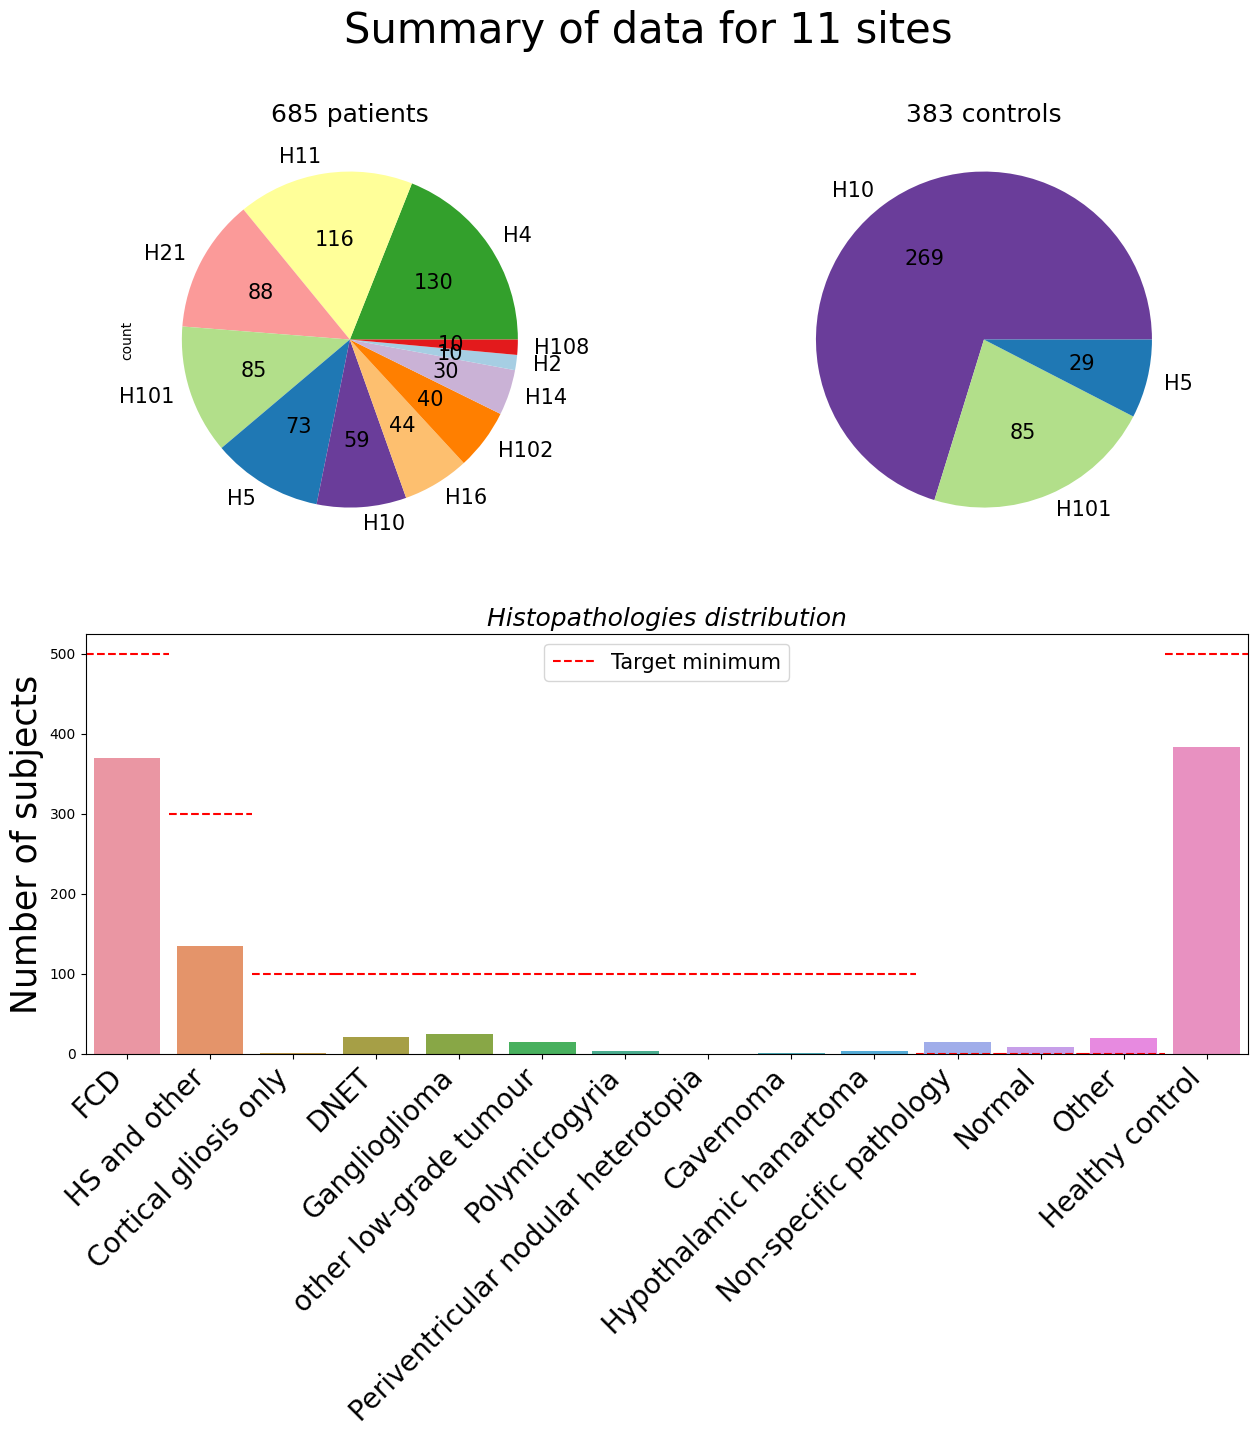

In [193]:
fig = plt.figure(figsize=(15,12))
fig.suptitle(f"Summary of data for {num_sites} sites", fontsize = 30)

gs = GridSpec(2, 2 , height_ratios=[2, 2], width_ratios=[1, 1], wspace=0.2)

##-------------------------------------------------------------
# plot patients and controls per sites
# Define a custom color mapping for each unique site
unique_sites = subdf['site'].unique()
site_colors = sns.color_palette("Paired", n_colors=len(unique_sites))
site_color_mapping = dict(zip(unique_sites, site_colors))

# Create a pie chart for patients
ax2 = fig.add_subplot(gs[0,0])
subdf_p = subdf[subdf['patient_control'] == 1]
site_counts_p = subdf_p['site'].value_counts()
site_counts_p.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_p)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_p.index], ax=ax2, fontsize=15,
)
ax2.set_xlabel('')
ax2.set_title(f'{num_patients} patients', fontsize=18)

# Create a pie chart for controls
ax3 = fig.add_subplot(gs[0,1])
subdf_c = subdf[subdf['patient_control'] == 2]
site_counts_c = subdf_c['site'].value_counts()
site_counts_c.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_c)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_c.index], ax=ax3, fontsize=15,
)
ax3.set_ylabel('')
ax3.set_title(f'{num_controls} controls', fontsize=18)

##-------------------------------------------------------------
# plot graph histopathologies

ax4 = fig.add_subplot(gs[1,0:2])

g=sns.countplot(x='main_category', data=subdf, order=list_categories, ax=ax4)
ax4.set_ylabel('Number of subjects', fontsize=25)
ax4.set_xlabel('')
ax4.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category
    ax4.axhline(y=threshold_value, color='red', linestyle='--', label=f'Threshold ({category}: {threshold_value})', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax4.legend([ax.get_legend_handles_labels()[0][0]],['Target minimum'], loc='upper center', fontsize=15)
ax4.set_title('Histopathologies distribution', loc='center',fontsize=18, style='italic')

# fig.savefig(save_file)



